In [1]:
!nvidia-smi

Wed Apr 19 12:23:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:15:00.0 Off |                    0 |
| N/A   32C    P0    55W / 300W |      0MiB / 32768MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch
import numpy as np
from torch.utils.data import random_split
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
import torchvision as tv
from torch.utils.data.dataloader import DataLoader
from torchvision import models as models
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

In [3]:
class SimpsonsDataset(Dataset):
    def __init__(self, transform=None) -> None:
        super().__init__()

        self.dataset = tv.datasets.ImageFolder('/usr/src/app/simpsons_dataset_kaggle', transform=transform)
        
    def __getitem__(self, index):
        return self.dataset[index]
        
    def __len__(self):
        return len(self.dataset)

In [4]:
def train_step():
    model.train()
    
    running_loss = 0.
    for images, labels in train_loader:
        #Переводим изображения и лейблы на GPU
        images = images.to(device)
        labels = labels.to(device)
        
        # Удаляем накопленные ранее градиенты.
        # parameter.grad = 0
        optimizer.zero_grad()
        
        # Делаем проход (forward pass).
        # Состояние модели `train` обеспечивает сохранение промежуточных результатов вычислений.
        # Эти сохраненные значения будут использованы ниже для вычисления градиента функции потерь.
        output = model(images)
        
        # Вычисляем функцию потерь на основе предсказания модели.
        loss = criterion(output, labels)

        # Вычисляем градиент: направление, в котором функция потерь возрастает максимально быстро.
        # parameter.grad += dloss / dparameter
        loss.backward()

        # parameter += -lr * parameter.grad
        # 
        # PyTorch SGD:
        # velocity = momentum * velocity + parameter.grad
        # parameter += - lr * velocity
        optimizer.step()
        
        # Накапливаем статистику.
        running_loss += loss
    
    with torch.no_grad():
        train_loss = running_loss / len(dataset)
    return train_loss.item()

def valid_step():
    model.eval()

    correct_total = 0.
    running_loss = 0.
    with torch.no_grad():
        for images, labels in valid_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            output = model(images)
            
            prediction = output.argmax(dim=1)
            correct_total += prediction.eq(labels.view_as(prediction)).sum()
            
            loss = criterion(output, labels)
            running_loss += loss
        
    valid_loss = running_loss / len(valid_loader)
    accuracy = correct_total / len(valid_loader.dataset)
    return valid_loss.item(), accuracy.item()

def test_step():
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

20944
cuda:0


  0%|          | 0/15 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Avg. train/valid loss: 0.7067/5.0111:   7%|▋         | 1/15 [02:19<32:33, 139.55s/it]

Epoch passed successfully


Avg. train/valid loss: 0.4465/1.7311:  13%|█▎        | 2/15 [04:37<30:05, 138.87s/it]

Epoch passed successfully


Avg. train/valid loss: 0.2695/1.3059:  20%|██        | 3/15 [06:56<27:43, 138.59s/it]

Epoch passed successfully


Avg. train/valid loss: 0.1864/0.6819:  27%|██▋       | 4/15 [09:14<25:24, 138.56s/it]

Epoch passed successfully


Avg. train/valid loss: 0.1408/0.5896:  33%|███▎      | 5/15 [11:34<23:10, 139.00s/it]

Epoch passed successfully


Avg. train/valid loss: 0.1084/0.7548:  40%|████      | 6/15 [14:23<22:23, 149.28s/it]

Epoch passed successfully


Avg. train/valid loss: 0.0814/0.4692:  47%|████▋     | 7/15 [17:16<20:55, 156.97s/it]

Epoch passed successfully


Avg. train/valid loss: 0.0643/0.4882:  53%|█████▎    | 8/15 [20:09<18:55, 162.20s/it]

Epoch passed successfully


Avg. train/valid loss: 0.0482/0.4549:  60%|██████    | 9/15 [22:54<16:17, 162.84s/it]

Epoch passed successfully


Avg. train/valid loss: 0.0347/0.4213:  67%|██████▋   | 10/15 [25:42<13:42, 164.50s/it]

Epoch passed successfully


Avg. train/valid loss: 0.0265/0.4118:  73%|███████▎  | 11/15 [28:37<11:10, 167.60s/it]

Epoch passed successfully


Avg. train/valid loss: 0.0206/0.4256:  80%|████████  | 12/15 [31:36<08:33, 171.17s/it]

Epoch passed successfully


Avg. train/valid loss: 0.0136/0.4109:  87%|████████▋ | 13/15 [34:46<05:53, 176.81s/it]

Epoch passed successfully


Avg. train/valid loss: 0.0134/0.3535:  93%|█████████▎| 14/15 [37:46<02:57, 177.87s/it]

Epoch passed successfully


Avg. train/valid loss: 0.0073/0.4202: 100%|██████████| 15/15 [40:42<00:00, 162.86s/it]

Epoch passed successfully


Text(0, 0.5, 'Loss')

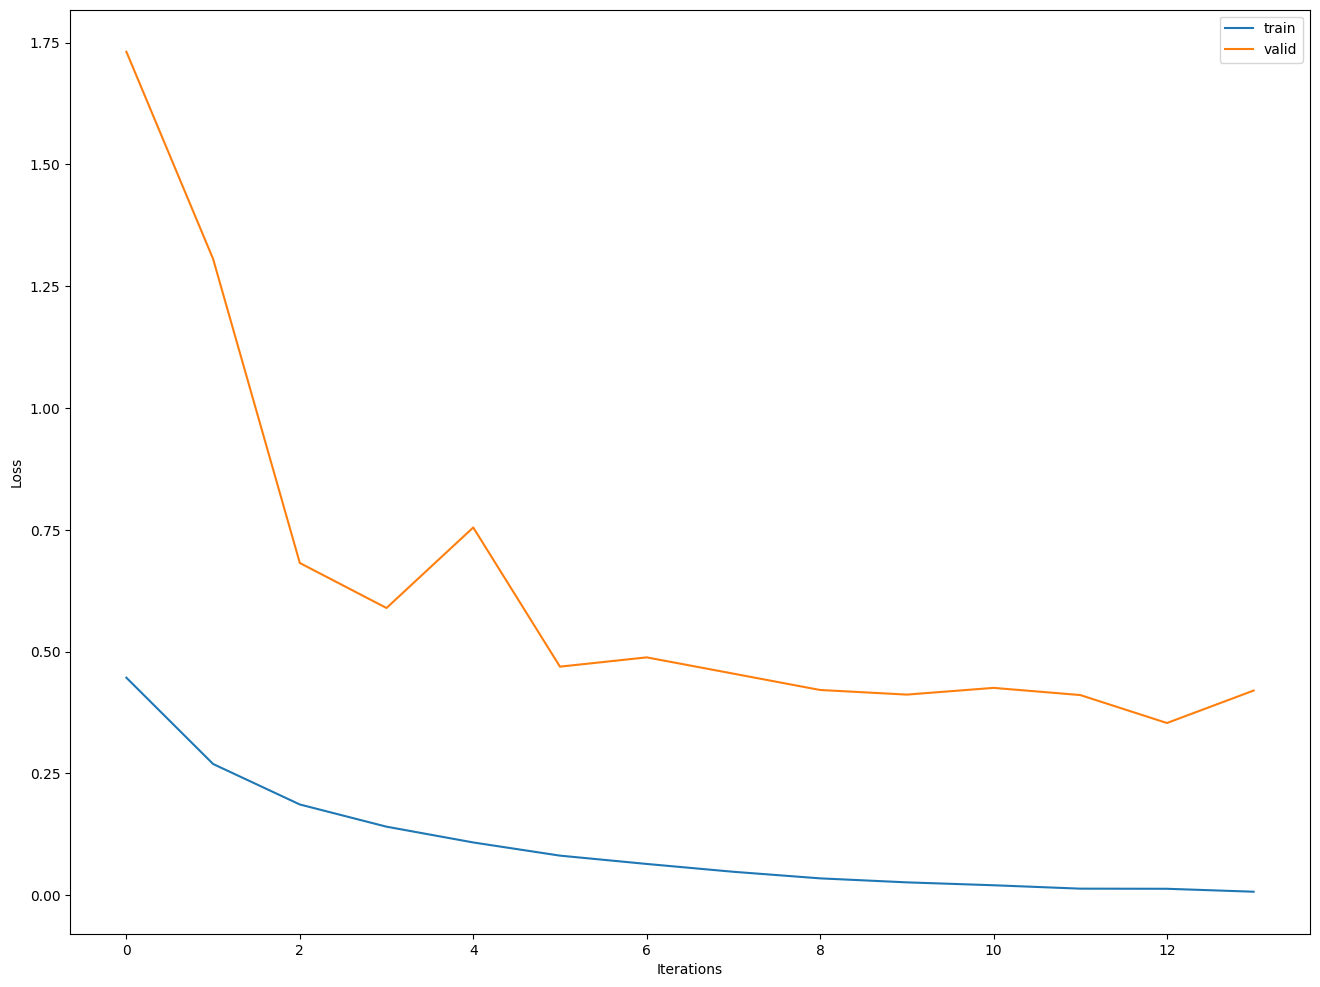

In [5]:
trans=tv.transforms.Compose([tv.transforms.ToTensor(), tv.transforms.Resize([248, 248])])
dataset = SimpsonsDataset(transform=trans)
print(len(dataset))

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

train_len = int(len(dataset) * 0.7)
valid_len = len(dataset) - train_len
#train_set, valid_set = random_split(dataset=dataset, lengths=[17799, 3142])
train_set, valid_set = random_split(dataset=dataset, lengths=[train_len, valid_len])
#model = tv.models.resnet18()
#model.fc = nn.Linear(in_features=512, out_features=43, bias=True)

model = tv.models.resnet18()
model.fc = nn.Linear(in_features=512, out_features=42, bias=True)
model.to(device)


train_loader, valid_loader = DataLoader(dataset=train_set, batch_size=3, shuffle=True), DataLoader(dataset=valid_set, batch_size=3, shuffle=True)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.01,
    momentum=0.9,
)

epochs = 15
train_losses = []
valid_losses = []
valid_accs = []

pbar = tqdm(range(epochs))

for _ in pbar:
    train_loss = train_step()
    valid_loss, valid_acc = valid_step()
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    valid_accs.append(valid_acc)
    
    pbar.set_description(f'Avg. train/valid loss: {train_loss:.4f}/{valid_loss:.4f}')
    print('Epoch passed successfully')

fig = plt.figure(figsize=(16, 12))

plt.plot(train_losses[1:], label='train')
plt.plot(valid_losses[1:], label='valid')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

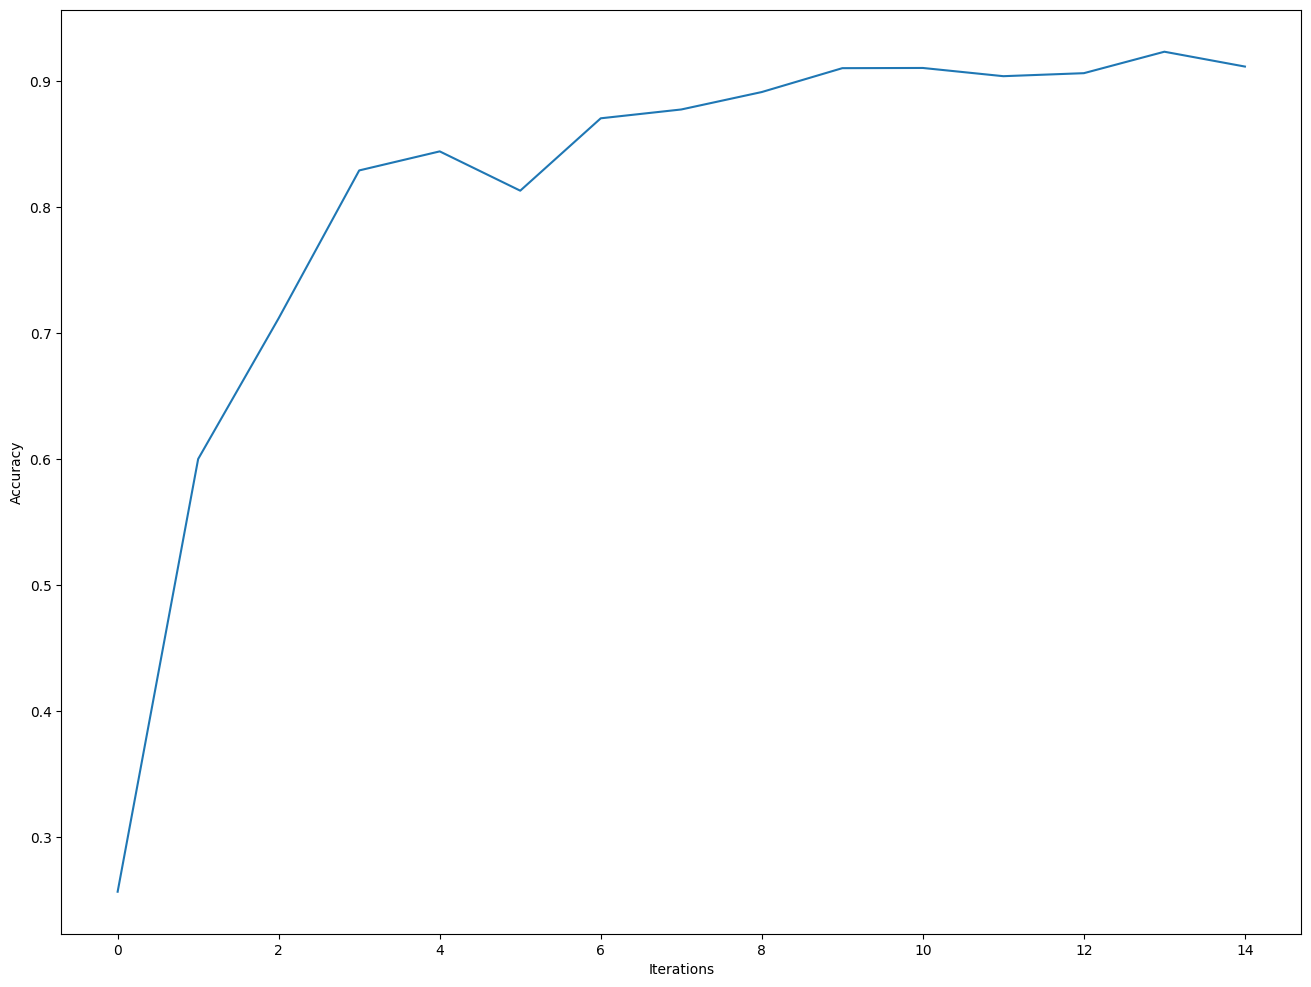

In [6]:
fig = plt.figure(figsize=(16, 12))

plt.plot(valid_accs)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

In [12]:
print(valid_accs[14])
print()

path_for_test = '/usr/src/app/kaggle_simpson_testset'
testset = os.listdir(path_for_test)
val = os.listdir('/usr/src/app/simpsons_dataset_kaggle')
key = [i for i in range(len(val))]

dic = zip(key, val)
dic = dict(dic)
print(dic)

0.9113621711730957
{0: 'comic_book_guy', 1: 'fat_tony', 2: 'lisa_simpson', 3: 'charles_montgomery_burns', 4: 'nelson_muntz', 5: 'edna_krabappel', 6: 'selma_bouvier', 7: 'martin_prince', 8: 'moe_szyslak', 9: 'kent_brockman', 10: 'apu_nahasapeemapetilon', 11: 'miss_hoover', 12: 'sideshow_bob', 13: 'sideshow_mel', 14: 'lionel_hutz', 15: 'marge_simpson', 16: 'milhouse_van_houten', 17: 'ned_flanders', 18: 'carl_carlson', 19: 'rainier_wolfcastle', 20: 'patty_bouvier', 21: 'waylon_smithers', 22: 'lenny_leonard', 23: 'gil', 24: 'otto_mann', 25: 'chief_wiggum', 26: 'abraham_grampa_simpson', 27: 'cletus_spuckler', 28: 'mayor_quimby', 29: 'homer_simpson', 30: 'principal_skinner', 31: 'ralph_wiggum', 32: 'troy_mcclure', 33: 'snake_jailbird', 34: 'agnes_skinner', 35: 'groundskeeper_willie', 36: 'bart_simpson', 37: 'maggie_simpson', 38: 'krusty_the_clown', 39: 'disco_stu', 40: 'professor_john_frink', 41: 'barney_gumble'}


In [13]:
name = []
correct = 0

for i in range(len(testset)):
    if i == 438:
        continue
    name.append(testset[i])
    testset[i] = tv.io.read_image(path_for_test + '/' + testset[i])
    testset[i].resize_(3, 248, 248)
    testset[i] = testset[i].to(torch.float32)
    testset[i] = testset[i].to(device) / 255
    output = model(testset[i].unsqueeze(0))
    classified = dic[output.argmax(dim=1).item()]
    
    if i > 438:
        if name[i - 1].find(classified) != -1:
            correct += 1
    else:
        if name[i].find(classified) != -1:
            correct += 1

In [14]:
correct

10

In [15]:
len(testset)

991

In [16]:
(correct / len(testset)) * 100

1.0090817356205852